# 이 얼마나 끔찍하고 무시무시한 수식이니
- https://www.acmicpc.net/problem/23629

- 변환되기 전의 수식을 정확하게 판단하여 정답을 구할 수 있다면 정답을 출력
- 만약 변환되기 전의 수식으로 가능한 것이 없다면 "Madness!"를 출력
- 양의 정수로 시작해서 양의 정수와 연산자가 번갈아서 등장하며, 마지막 연산자는 = 
- +, -, x, /, =

In [83]:
# 처음 구현 코드
import math
from collections import deque

number = {"0": "ZERO",
          "1": "ONE",
          "2": "TWO",
          "3": "THREE",
          "4": "FOUR",
          "5": "FIVE",
          "6": "SIX",
          "7": "SEVEN",
          "8": "EIGHT",
          "9": "NINE"}

s = input()

for i in number.items():
    s = s.replace(i[1], i[0])
s = s.rstrip('=')
s = s.replace('x', '*')

oper = []
num = ''
for i in s:
    if i.isdigit():
        num += i
    else:  # 연산자가 나오면
        if (i == '+' or i == '-' or i == '*' or i == '/'):
            if num:
                try:
                    oper.append(int(num))
                except:
                    print('Madness!')
                    exit(0)
                num = ''
                oper.append(i)
            else:
                if oper:
                    if not oper[-1].isdigit():
                        print('Madness!')
                        exit(0)
        else:
            print('Madness!')
            exit(0)

if num:
    oper.append(int(num))

if not oper:
    print('Madness!')
    exit(0)

queue = deque(oper)
ans = queue.popleft()
if ans == 0:
    print('Madness!')
    exit(0)
while queue:
    tmp = queue.popleft()
    try:
        num = queue.popleft()
    except:
        print('Madness!')
        exit(0)
    if tmp == '/':
        ans = math.trunc(ans / num)
    else:
        ans = eval(str(ans) + tmp + str(num))

result = ''
for i in str(ans):
    if i.isdigit():
        result += number[i]
    else:
        result += i

oper.append('=')
for i in oper:
    if i == '*':
        i = 'x'
    print(i, end='')
print()
print(result)

ONExONE=
1x1=
ONE


In [71]:
# eval()과 정규표현식 사용 코드
import re
import math
from collections import deque

number = {"0": "ZERO",
          "1": "ONE",
          "2": "TWO",
          "3": "THREE",
          "4": "FOUR",
          "5": "FIVE",
          "6": "SIX",
          "7": "SEVEN",
          "8": "EIGHT",
          "9": "NINE"}

s = input()

for i in number.items():
    s = s.replace(i[1], i[0])
s = s.rstrip('=')
s = s.replace('x', '*')

# 숫자
nums = re.findall('\d+', s)
# 연산자
calc = re.findall('\D+', s)

if not nums:
    print('Madness!')
    exit(0)

ans = nums.pop(0)
for i in calc:
    if i not in ['+', '-', '*', '/']:
        print('Madness!')
        exit(0)
    else:
        if i == '/':
            if nums:
                ans = math.trunc(eval(str(ans) + i + nums.pop(0)))
            else:
                print('Madness!')
                exit(0)
        else:
            if nums:
                ans = eval(str(ans) + i + nums.pop(0))
            else:
                print('Madness!')
                exit(0)

result = ''
for i in str(ans):
    if i.isdigit():
        result += number[i]
    else:
        result += i

s = s.replace('*', 'x')
s += '='
print(s)
print(result)

FIVEZEROxTWOTWO-ONEONEONEONE=
50x22-1111=
-ONEONE


# 배열 돌리기 4
- https://www.acmicpc.net/problem/17406

- 배열 A와 사용 가능한 회전 연산
- 배열 A의 최솟값
- 회전 연산은 모두 한 번씩 사용해야 하며, 순서는 임의로 정해도 된다.
- (r,c,s): (r-s, c-s), (r+s, c+s)인 정사각형을 시계 방향으로 한 칸씩 돌린다

In [85]:
from itertools import permutations
from copy import deepcopy

# k: 회전 연산의 개수
n, m, k = map(int, input().split())
# 배열
arr = [list(map(int, input().split())) for _ in range(n)]
# 회전 연산정보
rot = [list(map(int, input().split())) for _ in range(k)]
    
ans = float('inf')

# 1. 가능한 회전 순서 (최대 6!=720)
for p in permutations(rot, k):
    # 2. 회전
    copy_arr = deepcopy(arr)  # 원본리스트 카피
    for r, c, s in p:
        r -= 1
        c -= 1
        for n in range(s, 0, -1):
            tmp = copy_arr[r-n][c+n]
            copy_arr[r-n][c-n+1:c+n+1] = copy_arr[r-n][c-n:c+n]  # ->
            for row in range(r-n, r+n):  # ↑
                copy_arr[row][c-n] = copy_arr[row+1][c-n]
            copy_arr[r+n][c-n:c+n] = copy_arr[r+n][c-n+1:c+n+1]  # <-
            for row in range(r+n, r-n, -1):  # ↓
                copy_arr[row][c+n] = copy_arr[row-1][c+n]
            copy_arr[r-n+1][c+n] = tmp

    # 3. 각 행의 최소값 찾기
    for row in copy_arr:
        ans = min(ans, sum(row))

print(ans)

5 6 2
1 2 3 2 5 6
3 8 7 2 1 3
8 2 3 1 4 5
3 4 5 1 1 1
9 3 2 1 4 3
3 4 2
4 2 1
12


# 컨베이어 벨트 위의 로봇
- https://www.acmicpc.net/problem/20055

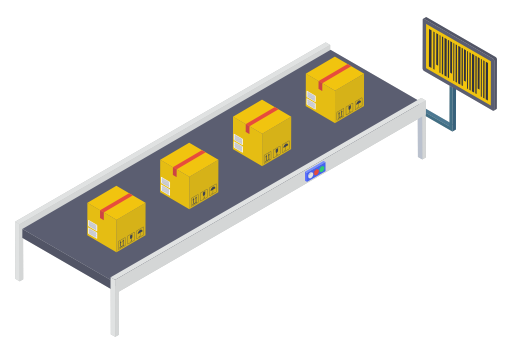
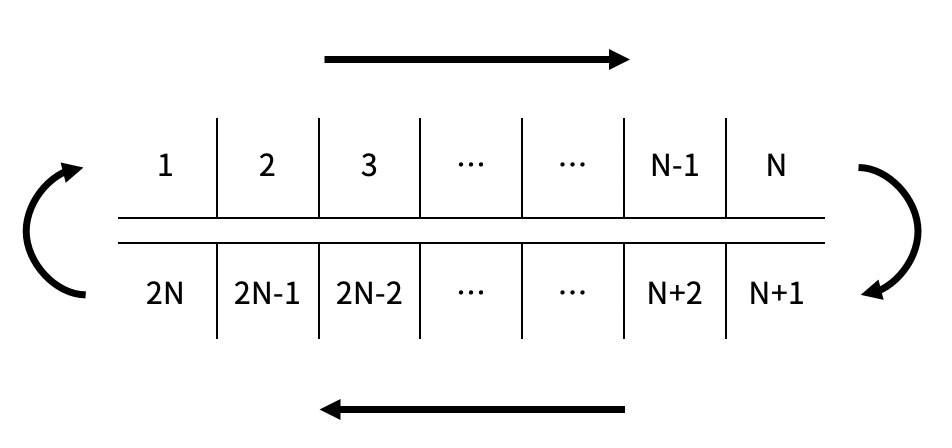

**1번 칸이 있는 위치를 "올리는 위치", N번 칸이 있는 위치를 "내리는 위치"라고 한다.**
1. 벨트가 각 칸 위에 있는 로봇과 함께 한 칸 회전한다.
2. 가장 먼저 벨트에 올라간 로봇부터, 벨트가 회전하는 방향으로 한 칸 이동할 수 있다면 이동한다. 만약 이동할 수 없다면 가만히 있는다.\
    1) 로봇이 이동하기 위해서는 이동하려는 칸에 로봇이 없으며, 그 칸의 내구도가 1 이상 남아 있어야 한다.
3. 올리는 위치에 있는 칸의 내구도가 0이 아니면 올리는 위치에 로봇을 올린다.
4. 내구도가 0인 칸의 개수가 K개 이상이라면 과정을 종료한다. 그렇지 않다면 1번으로 돌아간다.

In [170]:
from collections import deque

n, k = map(int, input().split())
belt = deque(list(map(int, input().split()))) # 내구도
robot = deque([0] * n) # 로봇

ans = 0

while True:
    # 1. 로봇과 벨트가 함께 한 칸 회전한다.
    belt.rotate(1)
    robot.rotate(1)
    robot[-1] = 0 # n번 위치는 로봇이 내려가는 부분
    if sum(robot): # 로봇이 있다면
        for i in range(n-2, -1, -1): # 로봇이 내려가는 부분을 제외하고 그 전인 n-2부터
            if robot[i] == 1 and robot[i+1] == 0 and belt[i+1] >= 1: # 로봇이 이동하기 위한 조건
                robot[i+1] = 1
                robot[i] = 0
                belt[i+1] -= 1 # 내구도 1만큼 감소
        robot[-1] = 0 # 로봇 아웃
    if belt[0] >= 1: # 3. 올리는 위치에 있는 칸의 내구도가 0이 아니면
        robot[0] = 1 # 올리는 위치에 로봇을 올린다
        belt[0] -= 1
    ans += 1
    # 4. 내구도가 0인 칸의 개수가 K개 이상이라면 종료
    if belt.count(0) >= k:
        break
        
print(ans)

3 2
1 2 1 2 1 2
2
